In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.datasets import make_classification 
from sklearn.linear_model import SGDClassifier 
from sklearn import metrics

# Data cleaning and features selection

In [2]:
df = pd.read_csv('data/framingham.csv')

In [3]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


Let's check the correlation between our variables 

<AxesSubplot:>

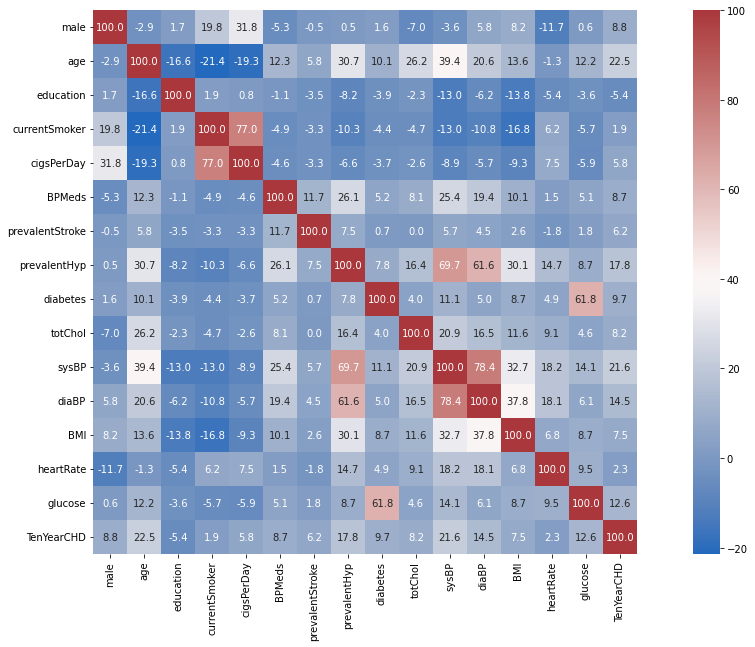

In [5]:
plt.figure(figsize=(20,10))

sns.heatmap(
    100*df.corr(), 
    square=True, 
    annot=True, 
    fmt='.1f', 
    cmap=sns.cm.vlag )

Removal of explanatory variables that are too correlated and not correlated with our explanatory variable 

In [6]:
corr = df.corr()
corr['TenYearCHD'].sort_values(ascending = False)

TenYearCHD         1.000000
age                0.225256
sysBP              0.216429
prevalentHyp       0.177603
diaBP              0.145299
glucose            0.125544
diabetes           0.097317
male               0.088428
BPMeds             0.087489
totChol            0.082184
BMI                0.075192
prevalentStroke    0.061810
cigsPerDay         0.057884
heartRate          0.022913
currentSmoker      0.019456
education         -0.054059
Name: TenYearCHD, dtype: float64

<AxesSubplot:xlabel='male', ylabel='count'>

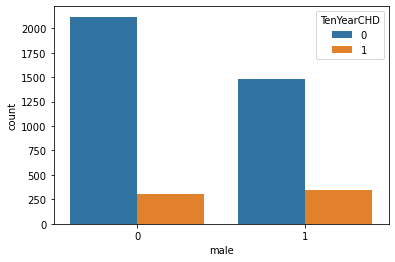

In [7]:
sns.countplot(x='male',hue='TenYearCHD',data=df)

<AxesSubplot:xlabel='diabetes', ylabel='count'>

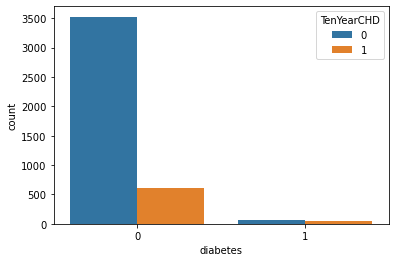

In [8]:
sns.countplot(x='diabetes',hue='TenYearCHD',data=df)

<AxesSubplot:xlabel='currentSmoker', ylabel='count'>

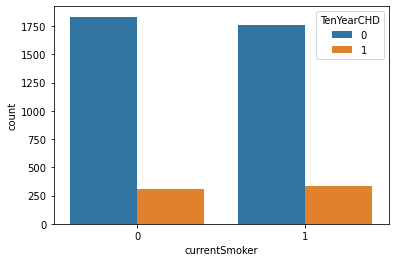

In [9]:
sns.countplot(x='currentSmoker',hue='TenYearCHD',data=df)

In [10]:
df['TenYearCHD'].value_counts()
print('{} have no risk of coronary heart disease and {} have'.format(df['TenYearCHD'].value_counts()[0], 
                                                                     df['TenYearCHD'].value_counts()[1]))

3594 have no risk of coronary heart disease and 644 have


The number of people that have the risk of coronary heart disease is very lower compared to the number of people that they haven't
which means that it could affect the model

forthe columns that have a strong correlation, we could drop one of them to avoid overfitting problems

In [11]:
df.drop(['education', 'currentSmoker', 'heartRate', 'sysBP' , 'diaBP' ], axis = 1, inplace = True) 

## separation between y and x 
y = df['TenYearCHD']
df.drop(['TenYearCHD'], axis = 1, inplace = True)

Data cleaning 

In [12]:
missing_values = {}

for i in range(0,len(df.isnull().sum().index)):
    if df.isnull().sum()[i] != 0:
        missing_values[df.isnull().sum().index[i]] = df.isnull().sum()[i]
        
missing_values = pd.Series(missing_values).to_frame() #Création d'un data frame
missing_values = missing_values.rename(columns = {0:'missing_values'}) 
missing_values

,missing_values
cigsPerDay,29
BPMeds,53
totChol,50
BMI,19
glucose,388


In [13]:
continuous_variables = dict(df.dtypes[(df.dtypes == 'float64')])
for elem in continuous_variables.keys(): 
    df[elem] = df[elem].fillna(df[elem].mean())

discrete_variables  = dict(df.dtypes[(df.dtypes == 'int64')])
for elem in discrete_variables.keys(): 
    df[elem] = df[elem].fillna(df[elem].mode())

In [14]:
# Generation of a model using the 'log' function for Logistic Regression 
model = SGDClassifier(max_iter=1000, eta0=0.01, loss='log') 
model.fit(df, y) 

SGDClassifier(eta0=0.01, loss='log')

Prediction of the model : 

In [15]:
y_predictions = model.predict(df)
print("prediction:", y_predictions[:25])
print("actual:", list(y[:25]))

prediction: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
actual: [0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0]


In [16]:
Comparison = pd.DataFrame({'Actual':y,'Predicted':y_predictions})
Comparison.sample(15)

,Actual,Predicted
990,0,0
1396,0,0
859,0,0
2170,0,0
3209,0,0
1831,0,0
3564,1,0
1867,0,0
1787,0,0
2554,0,0


Model accuracy :

In [17]:
precision = metrics.accuracy_score(y, y_predictions)
print("Accuracy of Logistic Model is:",precision * 100)

Accuracy of Logistic Model is: 84.92213308164229
